# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by df.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the df
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **dfset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX
from lifelines import CoxPHFitter   

In [385]:
df = pd.read_csv('motorbike_ambulance_calls.csv')

df.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


In [387]:
df.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [388]:
df.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [389]:
zero_values = df[(df == 0).any(axis=1)]
print(zero_values)

       index      date  season  yr  mnth  hr  holiday  weekday  workingday  \
0          1    1/1/11  spring   0     1   0        0        6           0   
1          2    1/1/11  spring   0     1   1        0        6           0   
2          3    1/1/11  spring   0     1   2        0        6           0   
3          4    1/1/11  spring   0     1   3        0        6           0   
4          5    1/1/11  spring   0     1   4        0        6           0   
...      ...       ...     ...  ..   ...  ..      ...      ...         ...   
17374  17375  12/31/12  spring   1    12  19        0        1           1   
17375  17376  12/31/12  spring   1    12  20        0        1           1   
17376  17377  12/31/12  spring   1    12  21        0        1           1   
17377  17378  12/31/12  spring   1    12  22        0        1           1   
17378  17379  12/31/12  spring   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  cnt  
0      

In [390]:
def transform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    print(df[date_col_name])
    return df

data = transform_date(data, 'date')
print(data['date'])

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]
0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]


In [391]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(data, 'date')

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


In [392]:
def encode_season(df: pd.DataFrame, season_col_name: str) -> pd.DataFrame:
    season_map = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
    
    df[season_col_name] = df[season_col_name].apply(lambda x: season_map.get(x.lower(), np.nan)) 
    df[season_col_name] = df[season_col_name].fillna(df[season_col_name])  
    
    return df

Correlation map

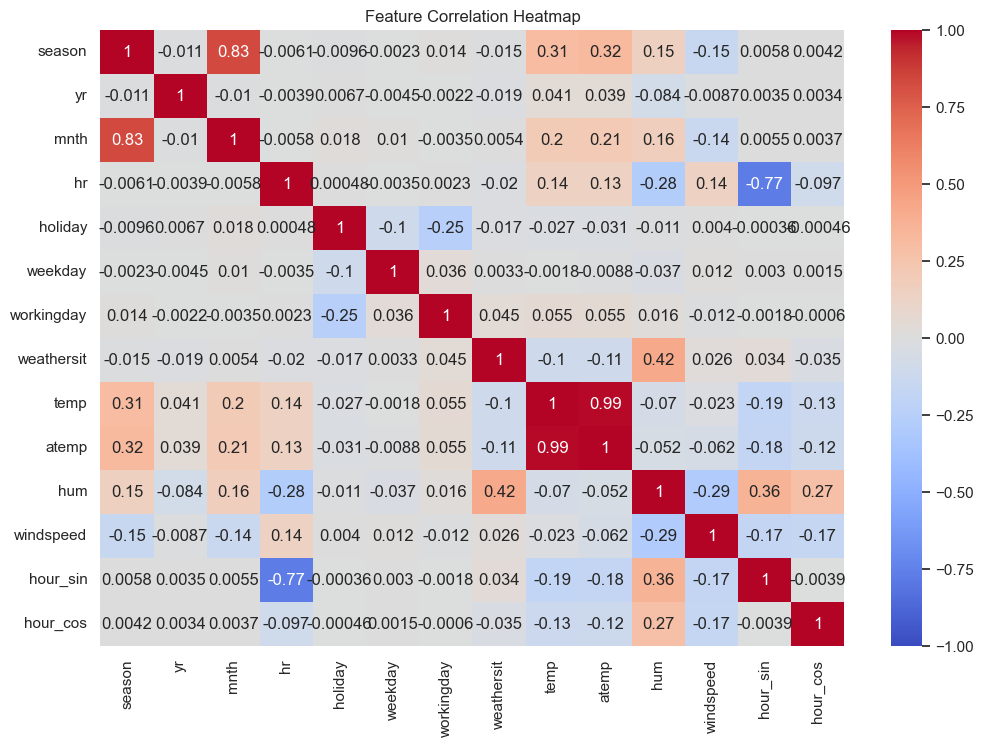

In [393]:
df = encode_season(df.copy(), 'season')

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df.fillna(df.mean(), inplace=True)

df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)

scaler = StandardScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

X = df.drop(['index', 'date', 'cnt'], axis=1)
y = df['cnt']

correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

Analysis of the influence of weather factors

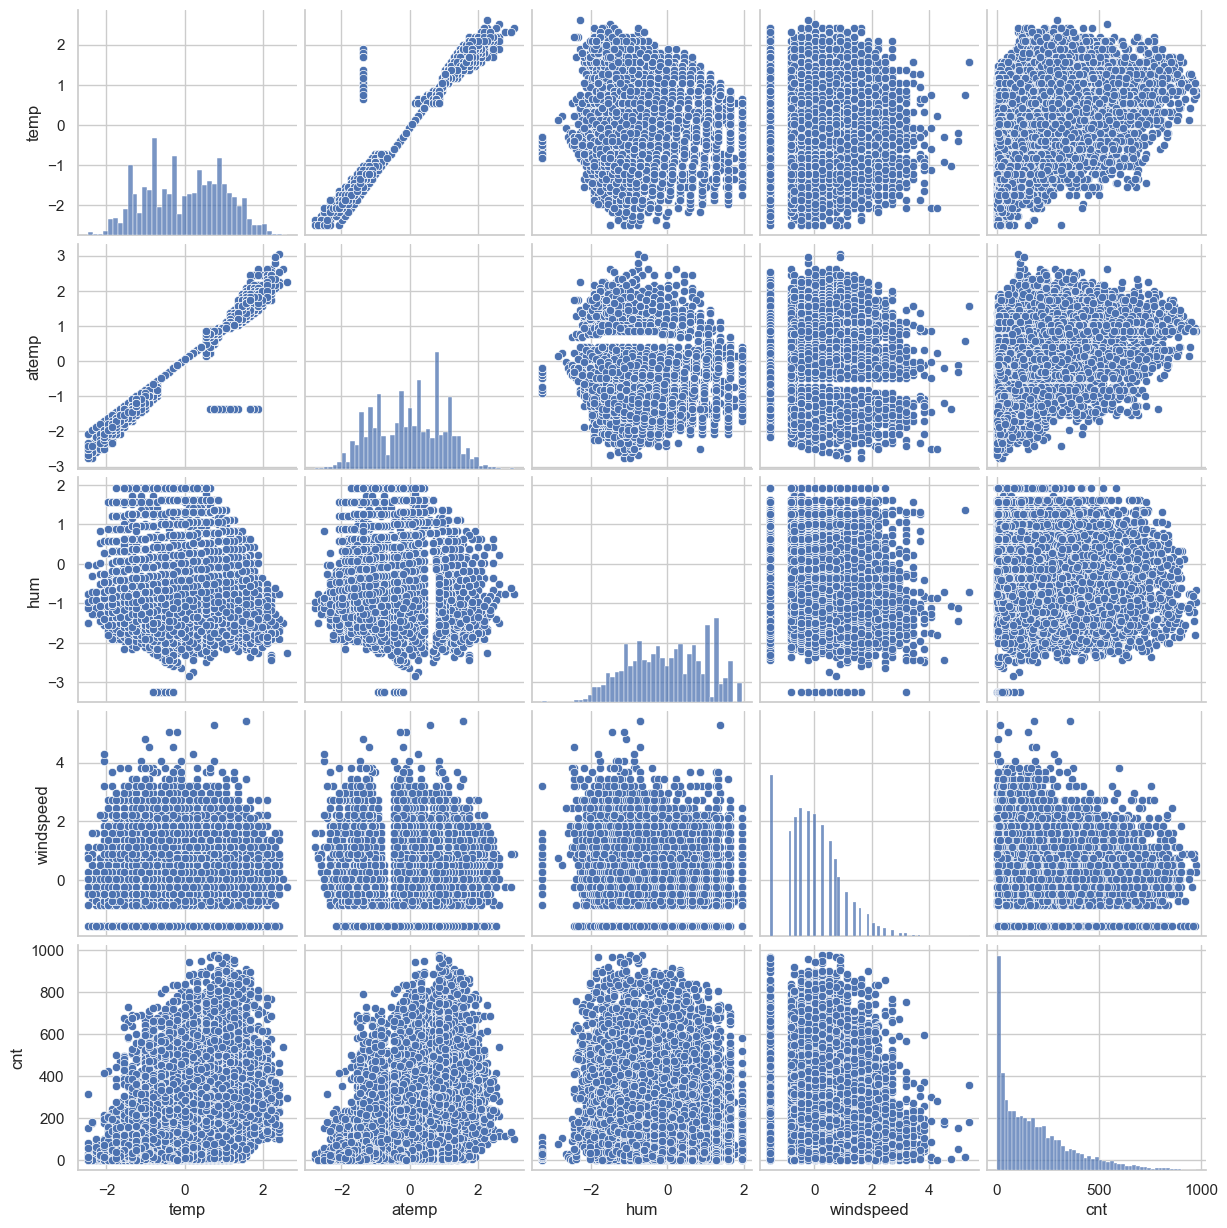

In [394]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

Analysis using Isolation Forest

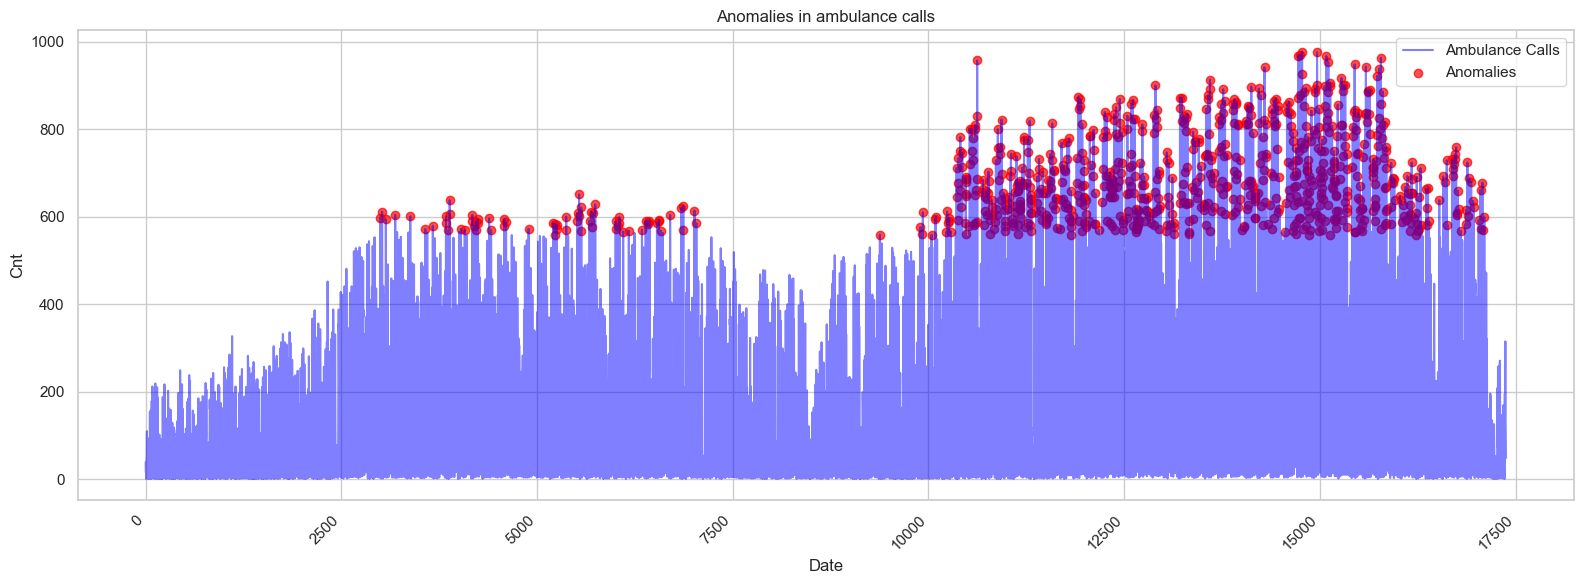

In [395]:
X = df[['cnt']]  

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X)
anomalies = df[df['anomaly'] == -1]

plt.figure(figsize=(16, 6)) 
plt.plot(df.index, df['cnt'], label='Ambulance Calls', color='blue', alpha=0.5)
plt.scatter(anomalies.index, anomalies['cnt'], color='red', label='Anomalies', alpha=0.7)

plt.title("Anomalies in ambulance calls")
plt.xlabel("Date")
plt.ylabel("Cnt")
plt.legend()
plt.xticks(rotation=45, ha='right') 
plt.grid(True)
plt.tight_layout()  
plt.show()

Regression model using XGBoost

XGBoost MAE: 0.8538642410784788, RMSE: 2.6478144917776953, R2: 0.9997785936993404


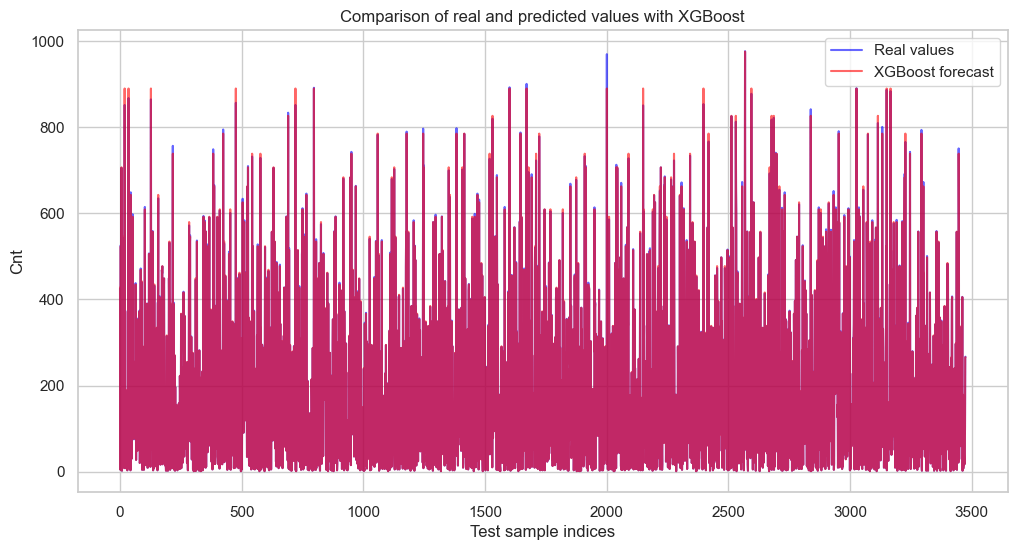

In [414]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MAE: {mae}, RMSE: {rmse}, R2: {r2}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Real values', color='blue', alpha=0.6)
plt.plot(y_pred, label='XGBoost forecast', color='red', alpha=0.6)
plt.title('Comparison of real and predicted values with XGBoost')
plt.xlabel('Test sample indices')
plt.ylabel('Cnt')
plt.legend()
plt.show()

Analysis of percentiles

0th percentile: 1.0, 50th percentile: 142.0, 90th percentile: 451.2000000000007


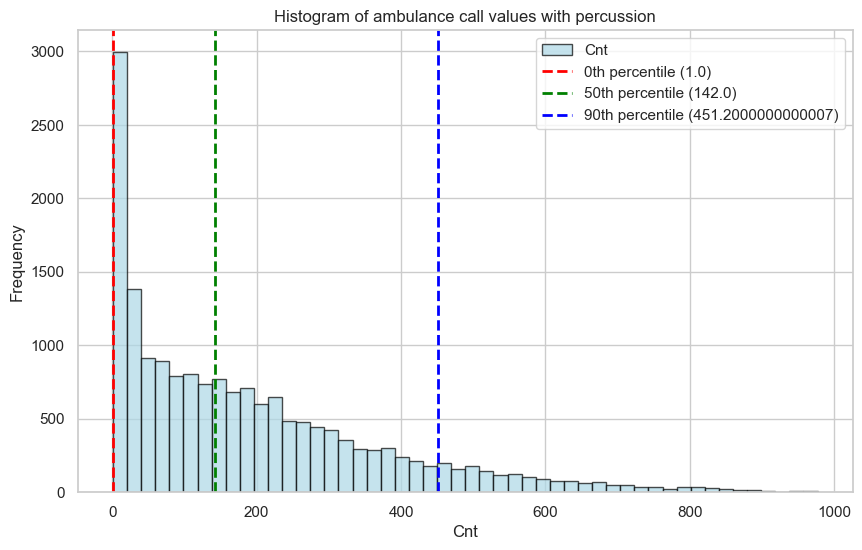

In [397]:
percentiles = np.percentile(df['cnt'], [0, 50, 90])
print(f"0th percentile: {percentiles[0]}, 50th percentile: {percentiles[1]}, 90th percentile: {percentiles[2]}")

percentiles = np.percentile(df['cnt'], [0, 50, 90])
plt.figure(figsize=(10, 6))
plt.hist(df['cnt'], bins=50, color='lightblue', edgecolor='black', alpha=0.7, label='Cnt')

plt.axvline(percentiles[0], color='red', linestyle='dashed', linewidth=2, label=f'0th percentile ({percentiles[0]})')
plt.axvline(percentiles[1], color='green', linestyle='dashed', linewidth=2, label=f'50th percentile ({percentiles[1]})')
plt.axvline(percentiles[2], color='blue', linestyle='dashed', linewidth=2, label=f'90th percentile ({percentiles[2]})')

plt.title('Histogram of ambulance call values with percussion')
plt.xlabel('Cnt')
plt.ylabel('Frequency')
plt.legend()
plt.show()


SARIMAX Model

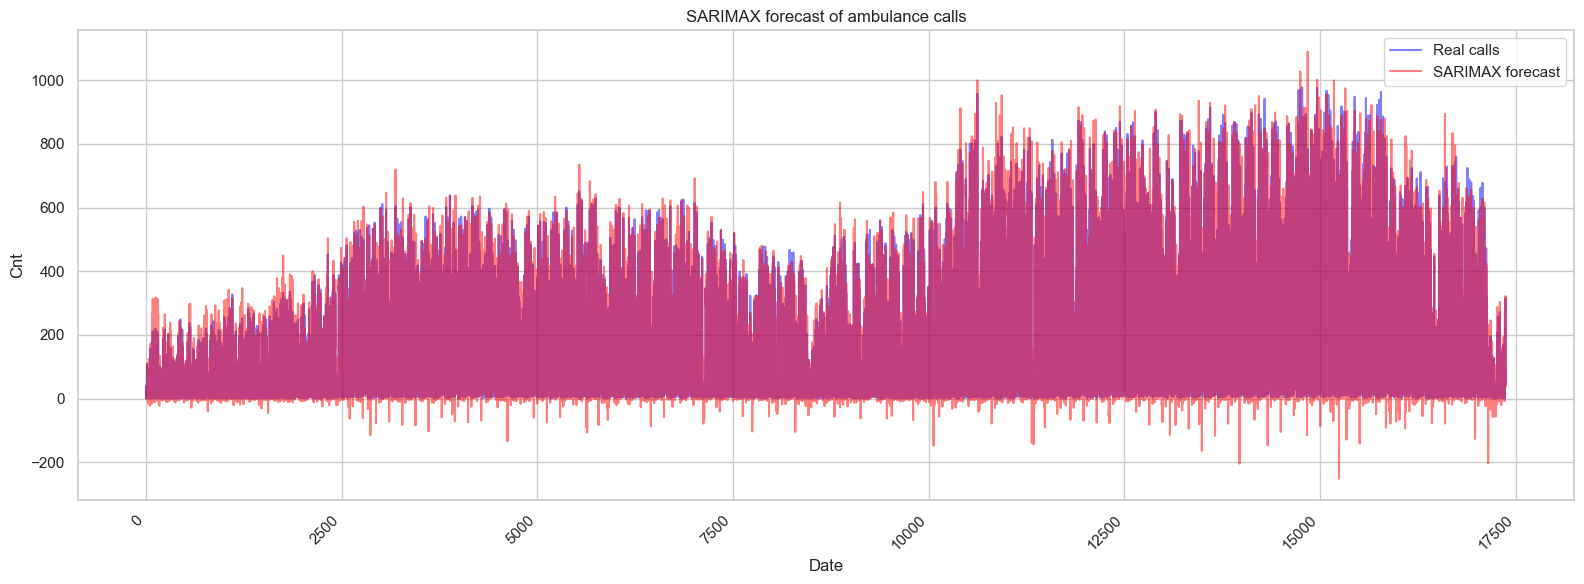

In [398]:
sarimax_model = SARIMAX(df['cnt'], 
                        order=(1, 1, 1), 
                        seasonal_order=(1, 1, 1, 24),  
                        enforce_stationarity=False, 
                        enforce_invertibility=False)

sarimax_results = sarimax_model.fit()
sarimax_pred = sarimax_results.predict(start=df.index[0], end=df.index[-1], dynamic=False)

plt.figure(figsize=(16, 6))  
plt.plot(df.index, df['cnt'], label='Real calls', color='blue', alpha=0.5)
plt.plot(sarimax_pred.index, sarimax_pred, label='SARIMAX forecast', color='red', alpha=0.5)
plt.xticks(rotation=45, ha='right')  

plt.title('SARIMAX forecast of ambulance calls')
plt.xlabel('Date')
plt.ylabel('Cnt')
plt.legend()
plt.grid(True)
plt.tight_layout() 
plt.show()

Scatterplots for 4 important features

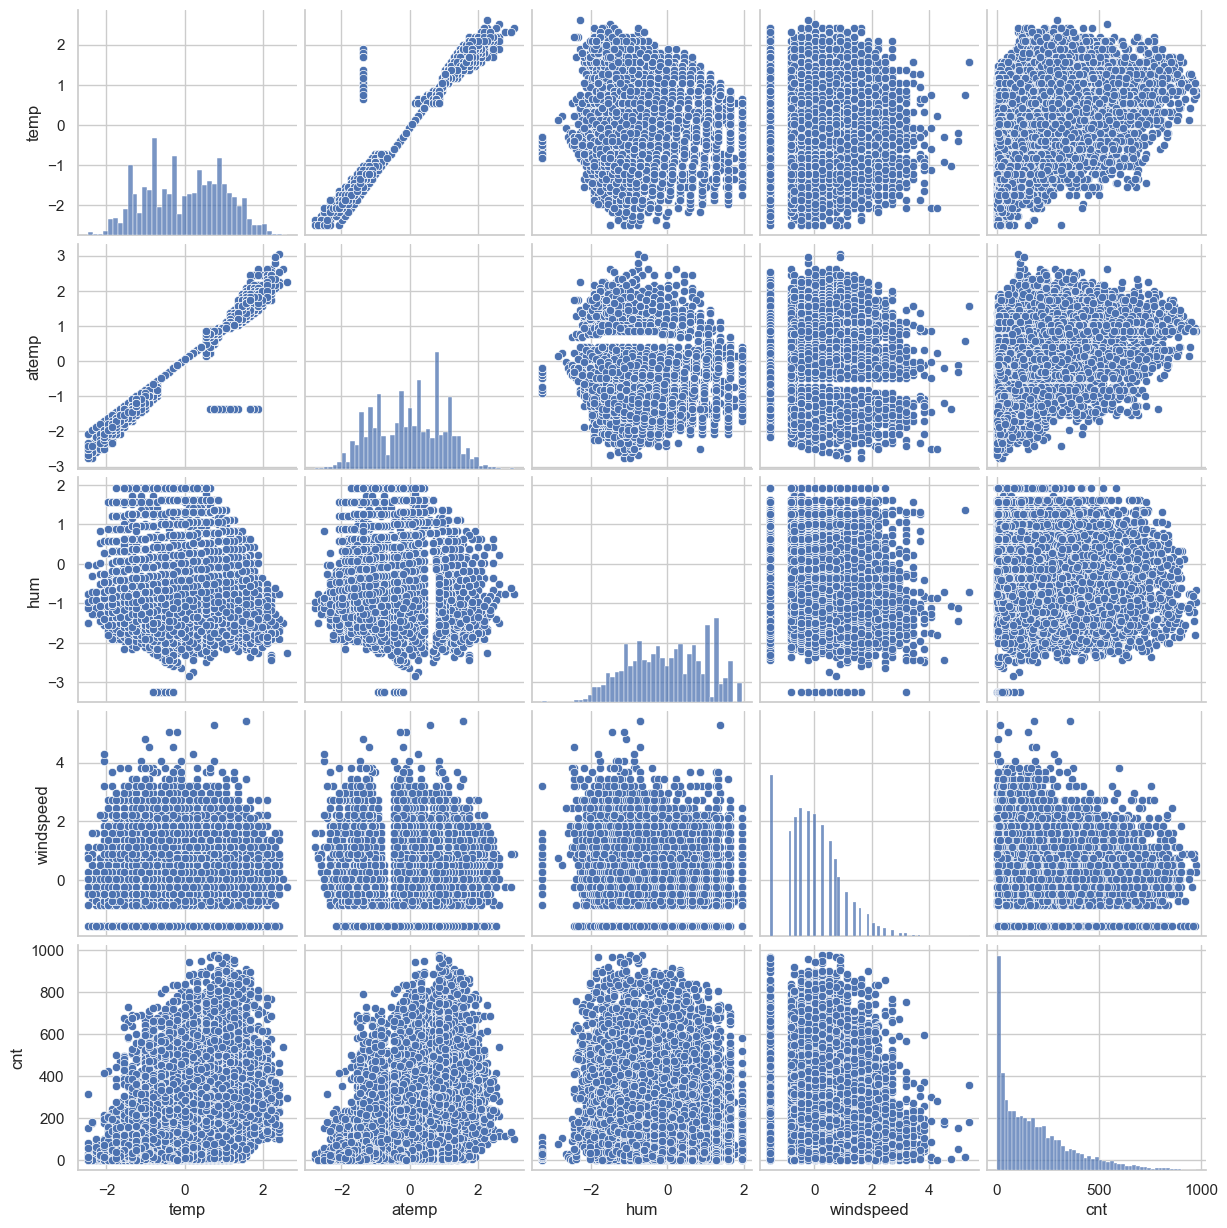

In [399]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

Histograms for numerical features

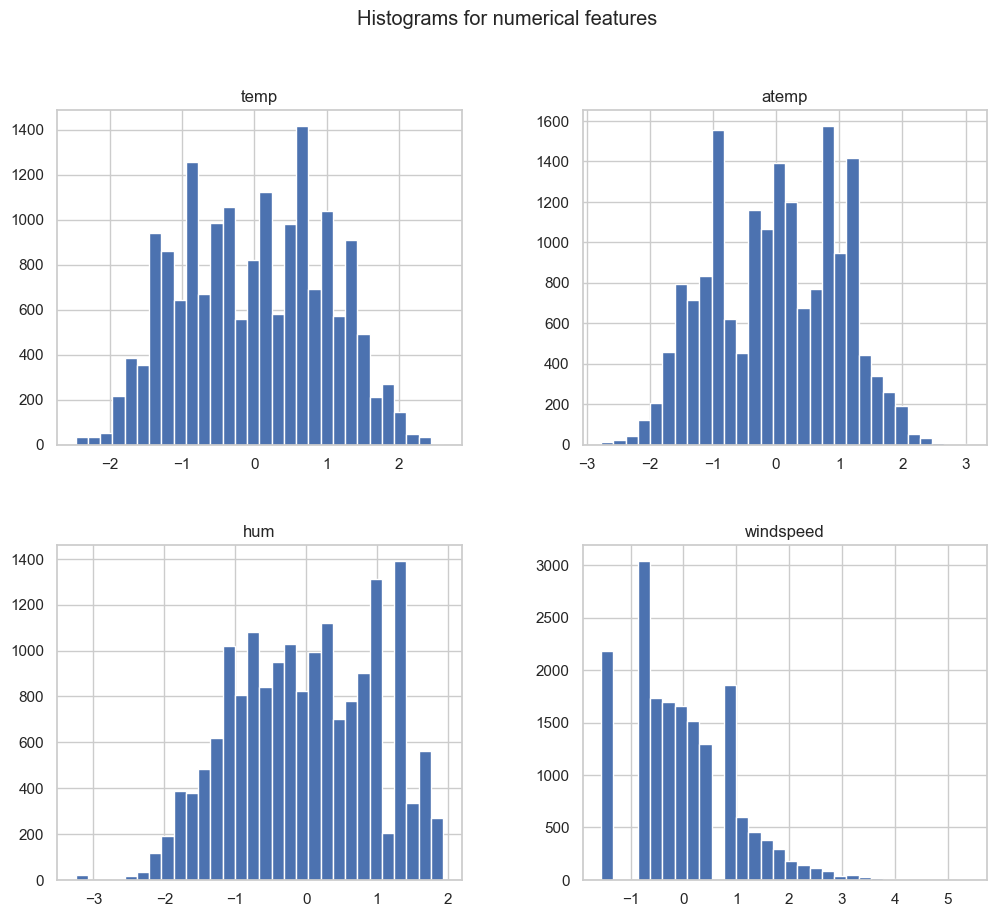

In [400]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
df[num_cols].hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms for numerical features')
plt.show()

Distribution density

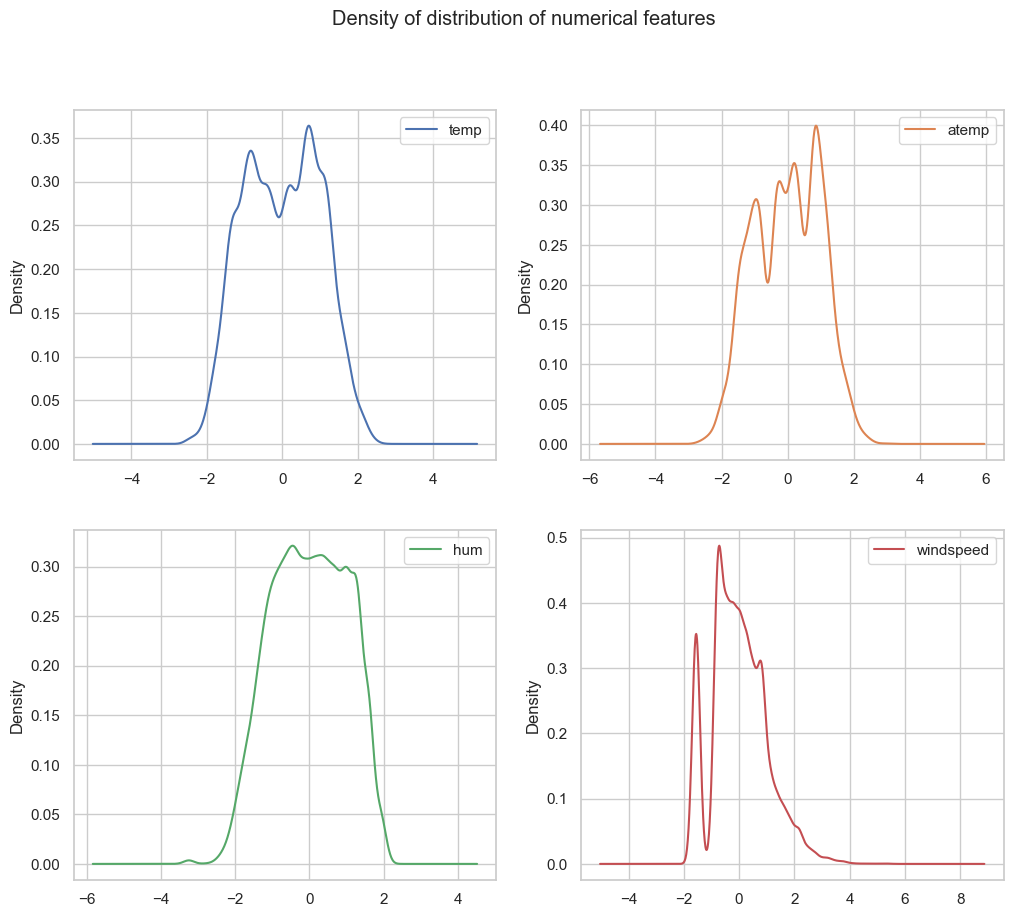

In [401]:
df[num_cols].plot(kind='density', subplots=True, layout=(2, 2), sharex=False, figsize=(12, 10))
plt.suptitle('Density of distribution of numerical features')
plt.show()

Quartiles for each feature

Quartiles for numerical features:
      temp   atemp   hum  windspeed
0.25  0.34  0.3333  0.48     0.1045
0.50  0.50  0.4848  0.63     0.1940
0.75  0.66  0.6212  0.78     0.2537


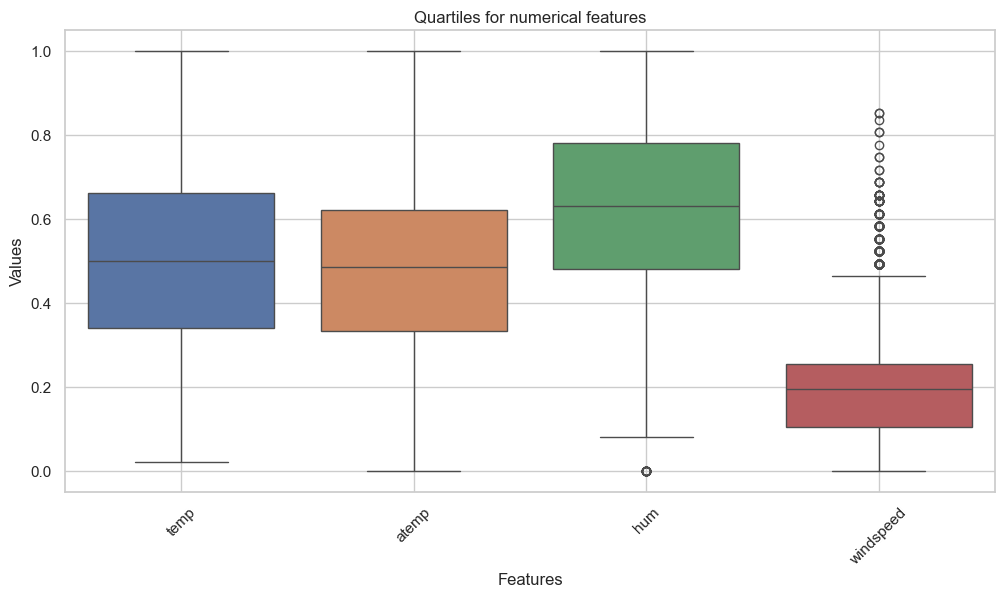

In [417]:
quartiles = df[num_cols].quantile([0.25, 0.5, 0.75])
print("Quartiles for numerical features:")
print(quartiles)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])

plt.title("Quartiles for numerical features")
plt.xlabel("Features")
plt.ylabel("Values")

plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

Cox Proportional Hazards

Index(['index', 'date', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'hour_sin', 'hour_cos', 'anomaly'],
      dtype='object')
   index       date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1 2011-01-01       1   0     1   0        0        6           0   
1      2 2011-01-01       1   0     1   1        0        6           0   
2      3 2011-01-01       1   0     1   2        0        6           0   
3      4 2011-01-01       1   0     1   3        0        6           0   
4      5 2011-01-01       1   0     1   4        0        6           0   

   weathersit      temp     atemp       hum  windspeed  cnt  hour_sin  \
0           1 -1.334648 -1.093281  0.947372  -1.553889   16  0.000000   
1           1 -1.438516 -1.181732  0.895539  -1.553889   40  0.258819   
2           1 -1.438516 -1.181732  0.895539  -1.553889   32  0.500000   
3           1 -1.334648 -1.093281  0.

<lifelines.CoxPHFitter: fitted with 17379 total observations, 8724 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 17379
number of events observed = 8655
   partial log-likelihood = -75845.16
         time fit was run = 2024-11-14 23:04:42 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
temp       -0.39       0.67       0.35            -1.09             0.30                 0.34                 1.35
atemp       0.75       2.12       0.40            -0.03             1.53                 0.98                 4.62
hum        -0.02       0.98       0.06            -0.14             0.10                 0.87                 1.11
windspeed   0.43       1.53       0.09             0.24             0.61                 1.27                 1.85

            cmp to     z      p   -log2(p)
covariate                                 
temp          0.00 -1.11   0.27       1.91
atemp         0.00  1.90   0.06       4.11
hum           0.00 -0.36   0.72       0.47
windspeed     0.00  4.52 <0.005      17.32
---
Concordance = 0.48
Partial AIC = 151698.33
log-likelihood ratio test = 41.85 on 4 df
-log2(p) of ll-ratio test = 25.73

C:\Users\User\AppData\Local\Temp\ipykernel_2836\2517795597.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_sorted.values, y=feature_importance_sorted.index, palette='viridis')


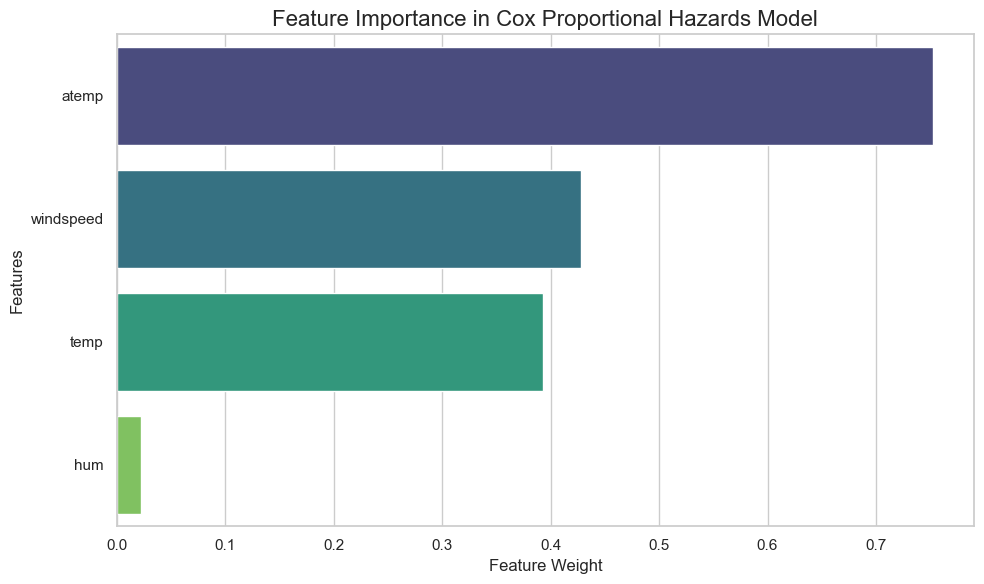

In [403]:
print(df.columns) 
print(df.head())   
df = pd.read_csv('motorbike_ambulance_calls.csv')
print("Columns in DataFrame:", df.columns)
print(df.head())

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y', errors='coerce') 

if df['date'].isnull().any():
    print("There are some errors in the date column, some values could not be converted.")

df['duration'] = (df['date'] - df['date'].min()).dt.days
df['event'] = np.random.choice([0, 1], size=len(df))  

cox_model = CoxPHFitter()
cox_model.fit(df[['duration', 'event', 'temp', 'atemp', 'hum', 'windspeed']], duration_col='duration', event_col='event')
cox_model.print_summary()

feature_importance = cox_model.params_
feature_importance_sorted = feature_importance.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_sorted.values, y=feature_importance_sorted.index, palette='viridis')

plt.title("Feature Importance in Cox Proportional Hazards Model", fontsize=16)
plt.xlabel("Feature Weight", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.tight_layout()
plt.show()

CONCLUSION

1. Analysis with Isolation Forest
The Isolation Forest model is used to detect anomalies in data. It builds trees that separate observations and finds those that are difficult to separate. In this case, anomalies are labeled with a value of -1, while normal points have a value of 1.

 The graph shows how abnormal ambulance calls are highlighted with red dots against the general background. This allows you to visualize deviations in the data that may be important for further analysis.

2. Regression model with XGBoost
XGBoost is a powerful gradient boosting model used for regression. It is trained on a training set and predicts the number of calls for the test set.

 The model evaluation shows metrics such as MAE (mean absolute error), RMSE (root mean square error), and R2. This allows you to evaluate the accuracy of the predictions.
 The feature importance graph shows which features have the greatest impact on the result, which helps in further optimizing the model.

3. Analysis of percentiles
We calculate percentiles for the number of ambulance calls. Percentiles help to understand the distribution of the data and determine where different data points are located:

 The 0th percentile is the minimum value,
 50th percentile is the median,
 90th percentile is the highest level, which helps to identify extreme values.

4. SARIMAX model 
The SARIMAX model combines ARIMA components for time series and takes into account seasonal fluctuations (24-hour cycle). It is useful for forecasting based on historical data:

 A forecast built with SARIMAX allows you to assess future challenges, taking into account cyclical effects and trends.

5. Feature vs. Target 
To better understand the relationship between features and the target variable (number of calls), we build scatterplots between different features and the target variable.

 These graphs allow us to see how changes in certain features affect the number of ambulance calls, which can be useful for interpreting the model.

6. Histograms and distribution density
We created histograms and density plots for the numerical features to understand their distribution.

 The density of the distribution allows you to see if the data is normal or has any abnormal deviations.

7. Quartiles for each feature
Calculating quartiles for numerical features allows you to determine how the data is distributed within different parts (25%, 50%, 75%).

 This is important for identifying possible anomalies and the overall structure of the data.

10. Cox Proportional Hazards model
The Cox Proportional Hazards model is used to analyze the time to an event (e.g., an ambulance call). The model estimates the impact of various variables on the probability that an event will occur at a certain point in time.

 This comprehensive approach to data analysis allows us to explore different aspects of ambulance call data using a variety of machine learning techniques and statistical models. We first prepared and normalized the data, then applied the models for anomaly detection, prediction, and analysis. Visualization of the data through graphs helped to better understand the relationships between features and target variables, as well as identify important patterns in the data.

OVERALL CONCLUSION

- for anomaly detection, Isolation Forest is the best choice, as it specializes in detecting outliers in data.
- for predicting future values (e.g., the number of calls), XGBoost is the best choice, as it provides highly accurate predictions, especially when there are complex nonlinear dependencies.
- if you need to take into account seasonal fluctuations and time patterns, SARIMAX is the best choice.
- For modeling the time to event or assessing risk factors, the Cox Proportional Hazards model is used, as it allows you to estimate how different variables affect the probability of an event.

In general, if your goal is to make accurate predictions based on time and cyclical patterns, SARIMAX or XGBoost are the best choices. If you need to detect anomalies in the data, Isolation Forest is the most suitable method.